# Instacart Market Basket Analysis

This jupyter notebook is formed by the exploratory statistical analysis and the market basket analysis using data from the Kaggle Instacart Market Basket Analysis competition.

The Python packages pandas, matplotlib, seaborn and plotly were used for the exploratory analysis, and the mlxtend package was used for the market basket analysis.

In [1]:
#Importing the packages used in this jupyter notenook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

%matplotlib inline
sns.set_theme()

In [2]:
#loading the data from Kaggle competition 
aisles = pd.read_csv("Data/aisles.csv", delimiter=",")
departments = pd.read_csv("Data/departments.csv", delimiter=",")
order_products__train = pd.read_csv("Data/order_products__train.csv", delimiter=",")
orders = pd.read_csv("Data/orders.csv", delimiter=",")
products = pd.read_csv("Data/products.csv", delimiter=",")

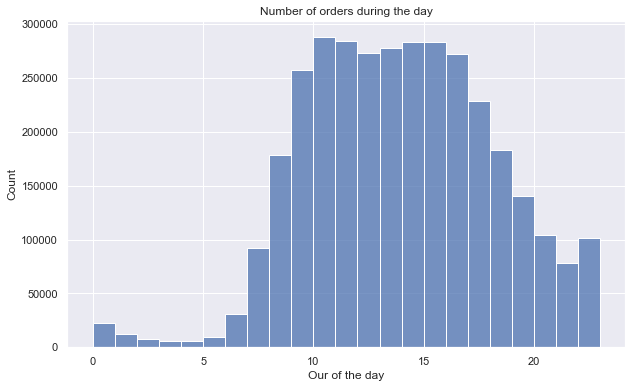

In [3]:
#The first graphic designed is the histogram of the purchases according to the hour of the day.
#It is possible to verify the behavior of the Instacart customers. Most of the purchases occur between 10 am and 8 pm.
plt.figure(figsize=(10,6))
fig = sns.histplot(data=orders, x = "order_hour_of_day", binwidth = 1)
fig.set(title="Number of orders during the day", xlabel="Our of the day", ylabel="Count")
The second graphic designed is a histogram of the number of reorders by the number of days.
This histogram reveals an interesting customers behavior. 
Most of them reorder the purchases monthly, and the second most of them reorder the purchases weekly.plt.show()

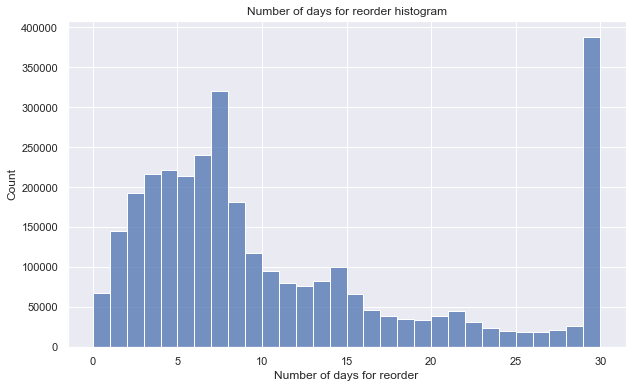

In [4]:
#The second graphic designed is a histogram of the number of reorders by the number of days.
#This histogram reveals an interesting customers behavior. 
#Most of them reorder the purchases monthly, and the second most of them reorder the purchases weekly.
plt.figure(figsize=(10,6))

fig = sns.histplot(data=orders, x="days_since_prior_order", binwidth=1)
fig.set(title="Number of days for reorder histogram", xlabel="Number of days for reorder", ylabel="Count")

plt.show()

In [5]:
dfNumberOfProductsByOrder = order_products__train[["order_id","product_id"]].groupby("order_id").count()

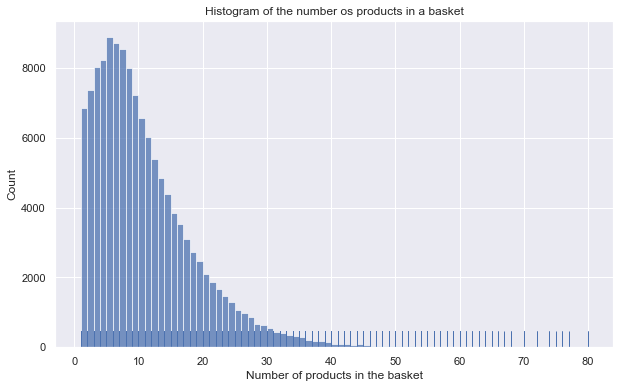

In [6]:
#This histogram presents the most common number of products for purchase.
#It shows that most customers order five products for purchase.
plt.figure(figsize=(10, 6))

sns.histplot(data=dfNumberOfProductsByOrder, x="product_id", binwidth=1). \
        set(title="Histogram of the number os products in a basket", xlabel="Number of products in the basket", ylabel="Count")
sns.rugplot(data=dfNumberOfProductsByOrder, x="product_id", expand_margins=False, height=.05)

plt.show()

In [7]:
#This table presents the most common product bought by Instacart customers.
prodSales = pd.merge(order_products__train, products, how="inner", on=["product_id", "product_id"])[["product_id", "product_name"]]
prodSalesCount = prodSales.groupby("product_name").count().nlargest(10, columns="product_id").reset_index()
prodSalesCount.rename(columns={"product_id": "Count"}, inplace=True)
prodSalesCount

,product_name,Count
0,Banana,18726
1,Bag of Organic Bananas,15480
2,Organic Strawberries,10894
3,Organic Baby Spinach,9784
4,Large Lemon,8135
5,Organic Avocado,7409
6,Organic Hass Avocado,7293
7,Strawberries,6494
8,Limes,6033
9,Organic Raspberries,5546


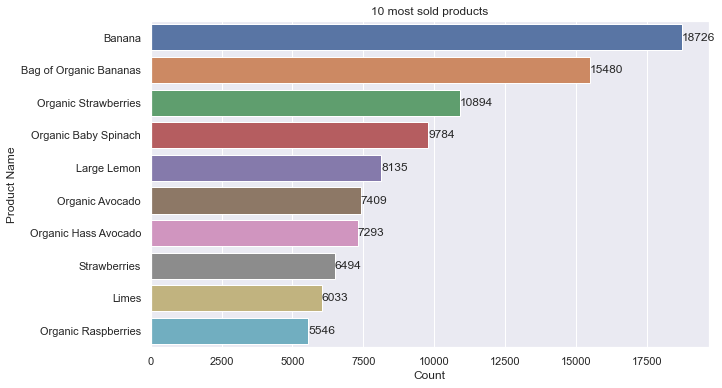

In [8]:
#The bar graphic organizes this information correctly.
#It is possible to verify that bananas and bags of bananas are the most common products bought by Instacart customers.
plt.figure(figsize=(10,6))

fig = sns.barplot(data=prodSalesCount, x="Count", y="product_name")
fig.bar_label(fig.containers[0])
fig.set(title="10 most sold products", xlabel="Count", ylabel="Product Name")
plt.show()

In [9]:
daysR = pd.merge(orders, order_products__train, how="inner", on=["order_id", "order_id"])#[["product_id", "product_name"]]
meanRByDays=daysR.groupby("days_since_prior_order").mean().reset_index()[["days_since_prior_order", "reordered"]]
meanRByDays.rename(columns={"reordered": "Mean"}, inplace=True)

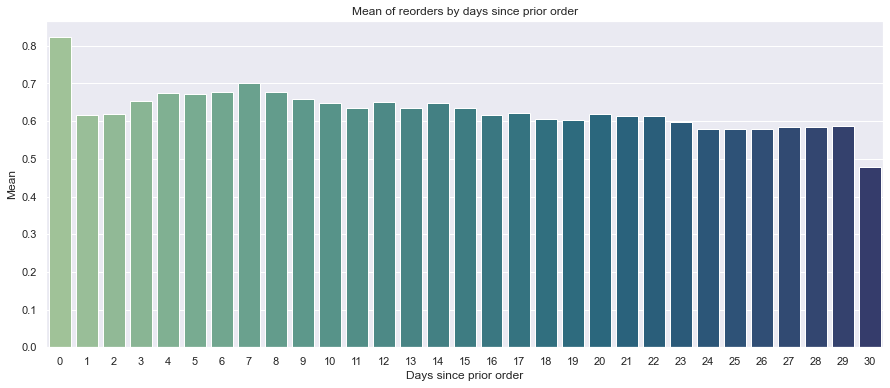

In [10]:
#This bar graphic presents the mean of reorders according to the number of days.
#On average, most orders are not reordered (0 days).
#On average, the less number of orders are reordered in 30 days.
plt.figure(figsize=(15,6))
sns.barplot(data=meanRByDays.astype({'days_since_prior_order': 'int64'}), x="days_since_prior_order", y="Mean", palette="crest").\
                        set(title="Mean of reorders by days since prior order", xlabel="Days since prior order", ylabel="Mean")
plt.show()

In [11]:
prodRMean = order_products__train.groupby("product_id").agg(count=("product_id", "count"), mean=('reordered', 'mean')).reset_index()

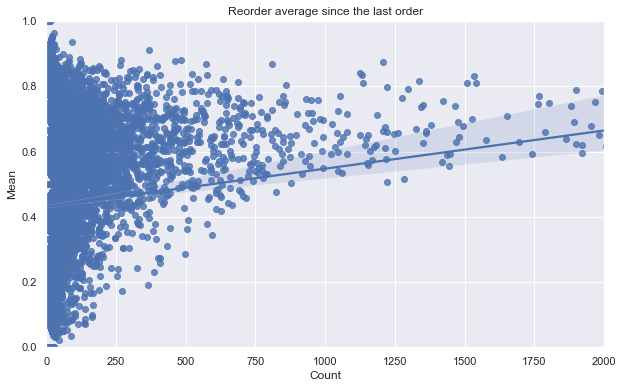

In [12]:
#This graphic presents the number of products by their average reorders.
#It is possible to verify that most products are reordered a lower amount of times.
plt.figure(figsize=(10,6))
fig=sns.regplot(data=prodRMean, x="count", y="mean")
fig.set(title="Reorder average since the last order", xlabel="Count", ylabel="Mean")
fig.set(xlim=(0,2000),ylim=(0,1))
plt.show()

In [13]:
products["organic"] = products["product_name"].apply(lambda x: "organic" if x.lower().find('organic') != -1 else "not organic")
mProOrderPro = pd.merge(order_products__train, products, how="inner", on=["product_id", "product_id"])
organic = mProOrderPro[["organic","order_id"]].groupby("organic").count()
organic = organic.apply(lambda x: 100 * x / x.sum()).reset_index().rename(columns={'order_id': 'percentage'})

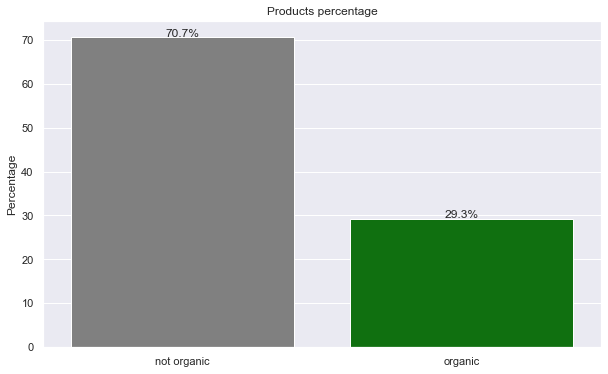

In [14]:
#This bar graph shows that 70% of the products are not organic, and 30% are organic in Instacart.
plt.figure(figsize=(10,6))

fig=sns.barplot(data=organic, x= "organic", y="percentage", palette=['gray', 'green'])
fig.set(title="Products percentage", xlabel="", ylabel="Percentage")

patches = fig.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   fig.annotate('{:.1f}%'.format(organic["percentage"][i]), (x, y), ha='center')
plt.show()

In [15]:
organicM = mProOrderPro[["organic","reordered"]].groupby("organic").mean().reset_index().rename(columns={'reordered': 'mean'})

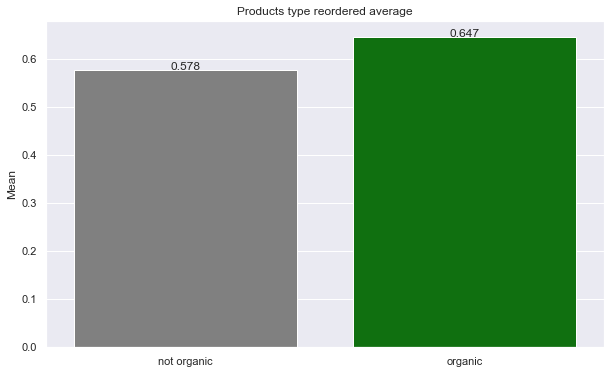

In [16]:
#This bar graph shows that, on average, around 64% of the organic products are reordered, and 58% of not organic products are 
#reordered.
plt.figure(figsize=(10,6))

fig=sns.barplot(data=organicM, x= "organic", y="mean", palette=['gray', 'green'])
fig.set(title="Products type reordered average", xlabel="", ylabel="Mean")

patches = fig.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()
   fig.annotate('{:.3f}'.format(organicM["mean"][i]), (x, y), ha='center')

plt.show()

In [17]:
prodep = pd.merge(products, departments, how="inner", on=["department_id", "department_id"])

proddepaisle = pd.merge(prodep, aisles, how="inner", on=["aisle_id", "aisle_id"])

alldf = pd.merge(proddepaisle, order_products__train, how="inner", on=["product_id", "product_id"])


alldf = alldf.groupby(["department", "aisle", 'product_name']).count().\
                                                    reset_index()[["department", "aisle", 'product_name', "product_id"]].\
                                                                                        rename(columns={'product_id': 'count'})

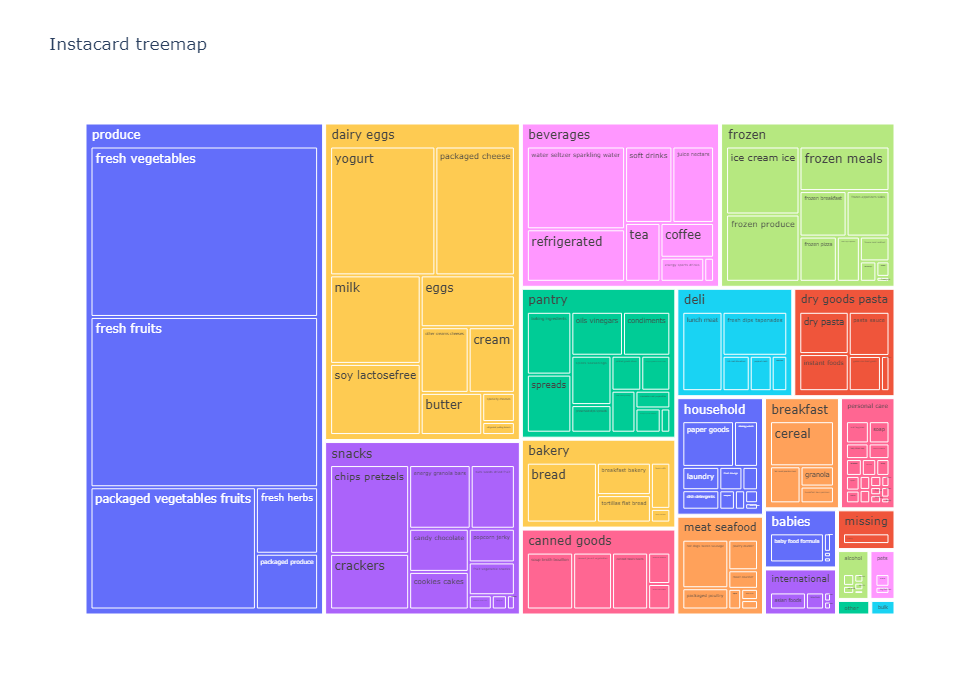

In [18]:
#This treemap is very interesting. It reveals how many products were purchased according to the department and aisle.
#It is possible to verify that the most purchased products are fresh vegetables and fresh fruits from the produce department.
import kaleido
fig = px.treemap(alldf,
                 path=['department', 'aisle'],
                 values='count',
                 color='department',
                 width=980, height=700,
                 title="Instacard treemap")
fig.show("png")

In [19]:
#Due to the computer memory constraints, I deallocated memory because the next step will start the Market Basket Analysis.
del aisles
del departments
del orders

del dfNumberOfProductsByOrder
del prodSales
del prodSalesCount
del daysR
del meanRByDays
del prodRMean
del mProOrderPro
del organicM
del prodep
del proddepaisle
del alldf

In [20]:
#This step identifies the products according to their orders to identify which products are bought together.
transDf = pd.merge(order_products__train, products, how="inner", on=["product_id","product_id"])
transDf[["has_prod_cart_order"]] = transDf[["add_to_cart_order"]] > 0

#Due to memory constraints, a slice of 97% of the available dataset was necessary.
#However, this amount of purchases is enough to list the products associations.
transDf=transDf[["order_id","product_name","has_prod_cart_order"]][0:1200000] #87% of the available database (memory constrain)
transDf

,order_id,product_name,has_prod_cart_order
0,1,Bulgarian Yogurt,True
1,816049,Bulgarian Yogurt,True
2,1242203,Bulgarian Yogurt,True
3,1383349,Bulgarian Yogurt,True
4,1787378,Bulgarian Yogurt,True
...,...,...,...
1199995,167127,Yeast Extract,True
1199996,423559,Yeast Extract,True
1199997,585210,Yeast Extract,True
1199998,1017255,Yeast Extract,True


In [21]:
#This step reorganizes the data based on the orders and their products.
basket = transDf.groupby(["order_id","product_name"])["has_prod_cart_order"].sum().unstack().\
                                                                    reset_index().fillna(0).set_index("order_id").astype(int)

basket = basket[(basket > 0).sum(axis=1) >= 2]

In [22]:
#Here, the market basket analysis Python package (mlxtend) is used to calculate the support of the Instacart products, 
#It reveals that bananas and bags of bananas have the highest support as expected.
frequent_items=apriori(basket, min_support=0.008, use_colnames=True).\
                                                            sort_values("support", ascending=False).reset_index(drop=True)
frequent_items

,support,itemsets
0,0.153413,(Banana)
1,0.126553,(Bag of Organic Bananas)
2,0.089337,(Organic Strawberries)
3,0.080216,(Organic Baby Spinach)
4,0.066877,(Large Lemon)
...,...,...
186,0.008050,(Creamy Peanut Butter)
187,0.008050,(Organic Bartlett Pear)
188,0.008041,(Romaine Hearts)
189,0.008017,"(Organic Large Extra Fancy Fuji Apple, Bag of ..."


In [23]:
#The association rules are listed using the market basket analysis Python package (mlxtend).
#It is possible to see that the Limes customers also buy Organic Cilantro.
#The customers that buy Large Lemon also buy Limes and so on.
association_rules(frequent_items, metric="lift", min_threshold=1).sort_values("lift", ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Organic Cilantro),(Limes),0.028985,0.049567,0.008297,0.286242,5.774898,0.006860,1.331591
1,(Limes),(Organic Cilantro),0.049567,0.028985,0.008297,0.167387,5.774898,0.006860,1.166226
2,(Large Lemon),(Limes),0.066877,0.049567,0.013141,0.196501,3.964385,0.009827,1.182868
3,(Limes),(Large Lemon),0.049567,0.066877,0.013141,0.265126,3.964385,0.009827,1.269773
4,(Organic Strawberries),(Organic Raspberries),0.089337,0.045521,0.013759,0.154016,3.383399,0.009693,1.128247
...,...,...,...,...,...,...,...,...,...
73,(Banana),(Organic Strawberries),0.153413,0.089337,0.017912,0.116756,1.306920,0.004206,1.031044
74,(Bag of Organic Bananas),(Organic Avocado),0.126553,0.060854,0.008816,0.069661,1.144727,0.001115,1.009467
75,(Organic Avocado),(Bag of Organic Bananas),0.060854,0.126553,0.008816,0.144869,1.144727,0.001115,1.021418
76,(Large Lemon),(Bag of Organic Bananas),0.066877,0.126553,0.008709,0.130221,1.028980,0.000245,1.004217
